In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
def add_col(jobs_df, spaced_name):
    spaced_name_lower = spaced_name
    possible_name_list = [spaced_name_lower]
    if spaced_name_lower.count(" ") > 0:
        # If the name has a space, replace with no space, then dash
        possible_name_list.append(spaced_name_lower.replace(" ", ""))
        possible_name_list.append(spaced_name_lower.replace(" ", "-"))
        
    contains_regex = "(?i)" + "|".join(possible_name_list)
    jobs_df[spaced_name] = jobs_df["Job Description"].str.contains(contains_regex)


def get_df():
    # Read csv as a df and drop NAs
    jobs_df = pd.read_csv("all_jobs.csv", usecols=range(1,16))

    # Add columns for the technologies that the job postings include in their description
    technology_list = []
    with open("technologies.txt") as tech_file:
        technology_list = tech_file.read().splitlines()

    for technology in technology_list:
        add_col(jobs_df, technology)
    
    # These two are weird with formatting so add manually
    # Scikit learn
    possible_name_list = ["Scikit learn", "Sci-kit learn", "Sci-kit-learn", "Scikit-learn"]
    contains_regex = "(?i)" + "|".join(possible_name_list)
    jobs_df["Scikit learn"] = jobs_df["Job Description"].str.contains(contains_regex)
    # R
    possible_name_list = [" R ", " R, "]
    contains_regex = "(?i)" + "|".join(possible_name_list)
    jobs_df["R"] = jobs_df["Job Description"].str.contains(contains_regex)

    # Turn location into just state
    jobs_df["State"] = jobs_df["Location"].str[-2:]
    pd.get_dummies(jobs_df, columns=["State"])

    # Drop description and unneeded cols
    jobs_df.drop("Job Title", axis=1, inplace=True)
    jobs_df.drop("Job Description", axis=1, inplace=True)
    jobs_df.drop("Rating", axis=1, inplace=True)
    jobs_df.drop("Company Name", axis=1, inplace=True)
    jobs_df.drop("Headquarters", axis=1, inplace=True)
    jobs_df.drop("Founded", axis=1, inplace=True)
    jobs_df.drop("Type of ownership", axis=1, inplace=True)
    jobs_df.drop("Industry", axis=1, inplace=True)
    jobs_df.drop("Sector", axis=1, inplace=True)
    jobs_df.drop("Revenue", axis=1, inplace=True)
    jobs_df.drop("Competitors", axis=1, inplace=True)
    jobs_df.drop("Easy Apply", axis=1, inplace=True)
    
    # Turn Salary and Size to int values
    jobs_df.drop(jobs_df[jobs_df['Size'] == "Unknown"].index, inplace = True)
    jobs_df.drop(jobs_df[jobs_df['Size'] == "-1"].index, inplace = True)
    jobs_df.drop(jobs_df[jobs_df['Salary Estimate'] == "Unknown"].index, inplace = True)
    jobs_df.drop(jobs_df[jobs_df['Salary Estimate'] == "-1"].index, inplace = True)

    def average_item(item):
        int_list = re.findall('\d+', item)
        int_list = [int(i) for i in int_list]
        return 1000 * sum(int_list) / len(int_list)

    jobs_df["Size"] = np.vectorize(average_item)(jobs_df["Size"])
    jobs_df["Salary Estimate"] = np.vectorize(average_item)(jobs_df["Salary Estimate"])
    
    return jobs_df
    
    
jobs_df = get_df()
mask = np.random.rand(len(jobs_df)) < 0.8
train_df = jobs_df[mask]
test_df = jobs_df[~mask]

In [181]:
#print(list(jobs_df.columns))
print(pd.unique(jobs_df["State"]))
print(jobs_df[jobs_df["State"] == "LA"])

# Fix states
jobs_df.loc[jobs_df["State"] == "te", "State"] = "RT"
jobs_df.loc[jobs_df["State"] == "is", "State"] = "IL"
jobs_df.loc[jobs_df["State"] == "ey", "State"] = "NJ"
jobs_df.loc[jobs_df["State"] == "do", "State"] = "CO"
jobs_df.loc[jobs_df["State"] == "ah", "State"] = "UH"
jobs_df.loc[jobs_df["State"] == "an", "State"] = "MI"
jobs_df.loc[jobs_df["State"] == "co", "State"] = "NM"

jobs_df.loc[jobs_df["Location"] == "Maryland", "State"] = "MD"
jobs_df.loc[jobs_df["Location"] == "Rhode Island", "State"] = "RD"
jobs_df.loc[jobs_df["Location"] == "Georgia", "State"] = "GA"
jobs_df.loc[jobs_df["Location"] == "Pennsylvania", "State"] = "PA"
jobs_df.loc[jobs_df["Location"] == "California", "State"] = "CA"
jobs_df.loc[jobs_df["Location"] == "Virginia", "State"] = "VA"
jobs_df.loc[jobs_df["Location"] == "West Virginia", "State"] = "WV"
jobs_df.loc[jobs_df["Location"] == "Arizona", "State"] = "AZ"
jobs_df.loc[jobs_df["Location"] == "Indiana", "State"] = "IN"
jobs_df.loc[jobs_df["Location"] == "Lousiana", "State"] = "LA"
jobs_df.loc[jobs_df["Location"] == "Montana", "State"] = "MT"
jobs_df.loc[jobs_df["Location"] == "North Carolina", "State"] = "NC"
jobs_df.loc[jobs_df["Location"] == "South Carolina", "State"] = "SC"
jobs_df.loc[jobs_df["Location"] == "Connecticut", "State"] = "CT"
jobs_df.loc[jobs_df["Location"] == "Minnesota", "State"] = "MN"
jobs_df.loc[jobs_df["Location"] == "North Dakota", "State"] = "ND"
jobs_df.loc[jobs_df["Location"] == "South Dakota", "State"] = "SD"
jobs_df.loc[jobs_df["Location"] == "Oklahoma", "State"] = "OK"
jobs_df.loc[jobs_df["Location"] == "Alabama", "State"] = "AL"
jobs_df.loc[jobs_df["Location"] == "Massachusetts", "State"] = "MA"
jobs_df.loc[jobs_df["Location"] == "Arkansas", "State"] = "AR"
jobs_df.loc[jobs_df["Location"] == "Kansas", "State"] = "KS"
jobs_df.loc[jobs_df["Location"] == "Texas", "State"] = "TX"
jobs_df.loc[jobs_df["Location"] == "Oregon", "State"] = "OR"
jobs_df.loc[jobs_df["Location"] == "Washington", "State"] = "WA"

jobs_df.drop(jobs_df[jobs_df['State'] == "da"].index, inplace = True)  # Canada
jobs_df.drop(jobs_df[jobs_df['State'] == "io"].index, inplace = True)  # Ontario
jobs_df.drop(jobs_df[jobs_df['State'] == "es"].index, inplace = True)  # No State
jobs_df.drop(jobs_df[jobs_df['State'] == "om"].index, inplace = True)  # None?

# Drop Location
jobs_df.drop("Location", axis=1, inplace=True)


['NY' 'NJ' 'CA' 'IL' 'TX' 'AZ' 'PA' 'DE' 'FL' 'IN' 'OH' 'NC' 'SC' 'UT'
 'VA' 'WA' 'GA' 'KS' 'CO' 'DC' 'MD' 'MA' 'TN' 'MI' 'OK' 'OR' 'NV' 'KY'
 'WI' 'NM' 'MO' 'NE' 'MN' 'LA' 'HI' 'AK' 'te' 'da' 'es' 'is' 'ey' 'do'
 'io' 'ia' 'ah' 'VT' 'na' 'ut' 'ta' 'ma' 'ts' 'nd' 'an' 'as' 'co' 'on'
 'SA' 'om']
       Salary Estimate         Location        Size  Tensor Flow  Python  \
13815          67000.0  New Orleans, LA    125500.0        False   False   
13816          67000.0  New Orleans, LA     25500.0        False   False   
13817          67000.0  New Orleans, LA     25500.0        False    True   
13818          67000.0  New Orleans, LA  10000000.0        False   False   
13820          67000.0  New Orleans, LA     25500.0        False   False   
15820          67000.0  New Orleans, LA    125500.0        False   False   

         SQL   Java    SAS   Hive  Mat Lab  ...  Jupyter  Mat plot lib   NLTK  \
13815   True  False  False  False    False  ...    False         False  False   
13816  Fa

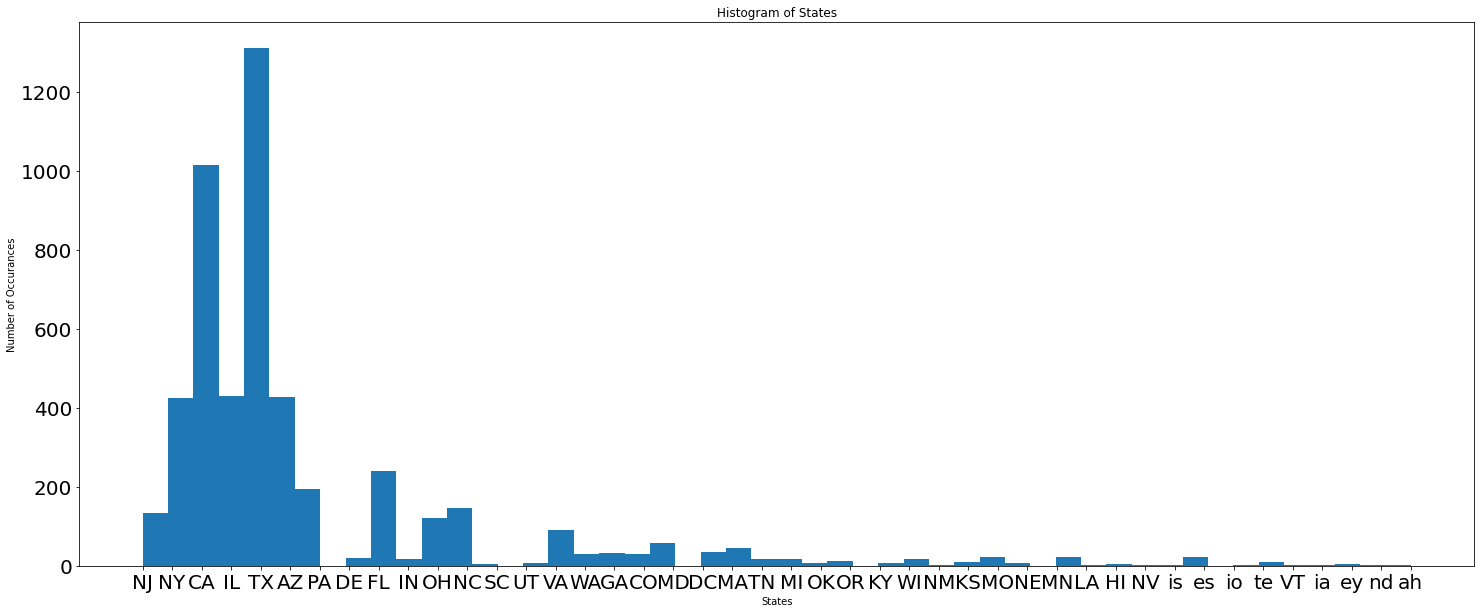

In [199]:
plt.figure(figsize=(25,10))
plt.hist(test_df["State"], bins=50)
plt.title("Histogram of States")
plt.xlabel("States")
plt.ylabel("Number of Occurances")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

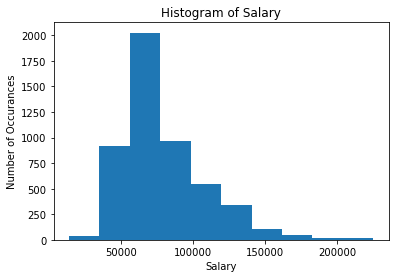

In [200]:
plt.hist(test_df["Salary Estimate"], bins=10)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Occurances")
plt.show()

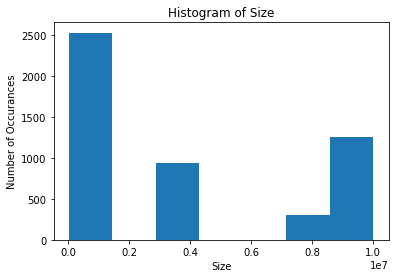

In [209]:
plt.hist(test_df["Size"], bins=7)
plt.title("Histogram of Size")
plt.xlabel("Size")
plt.ylabel("Number of Occurances")
plt.show()

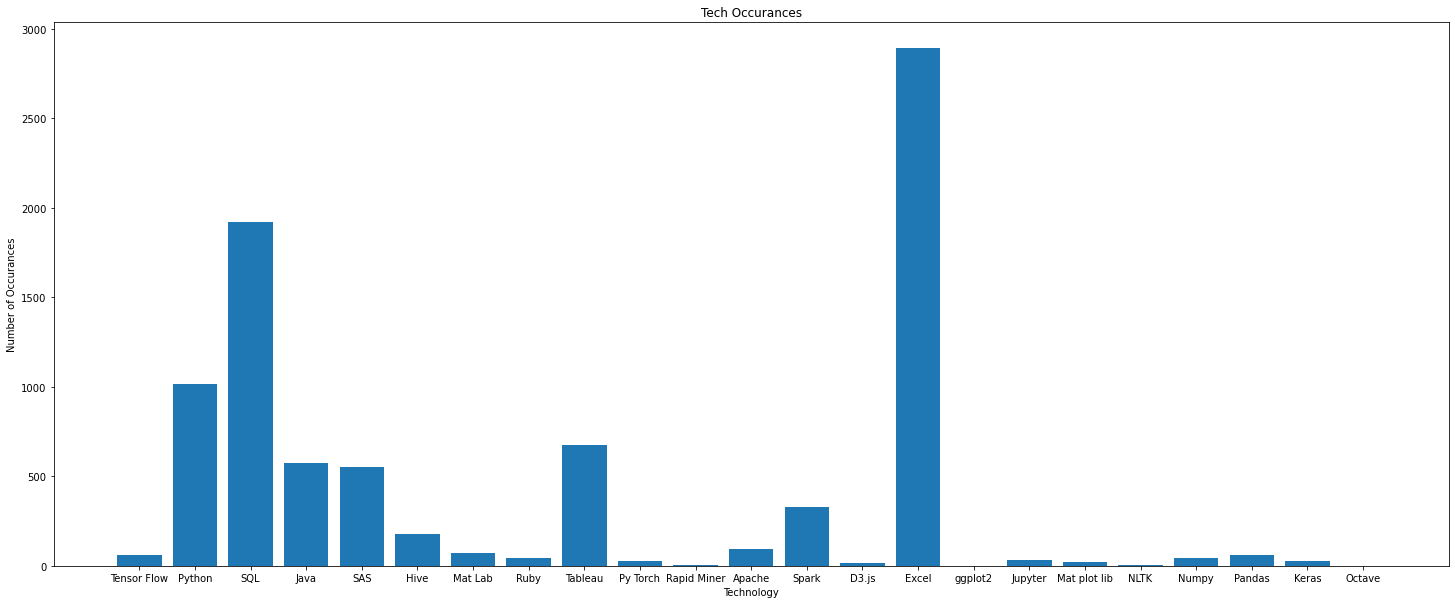

In [224]:
technology_list = []
with open("technologies.txt") as tech_file:
    technology_list = tech_file.read().splitlines()
    
count_list = []
for tech in technology_list:
    count_list.append(test_df[tech].sum())
    
plt.figure(figsize=(25,10))
plt.bar(x=technology_list, height=count_list)
plt.title("Tech Occurances")
plt.xlabel("Technology")
plt.ylabel("Number of Occurances")
plt.show()